In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [61]:
big_df = pd.read_csv('../final/total_df.csv')
big_df.shape

(28537, 10)

In [66]:
big_df['rating'].value_counts()

rating
5.0    2236
4.0     262
1.0     118
3.0     116
2.0      44
Name: count, dtype: int64

<Axes: xlabel='rating'>

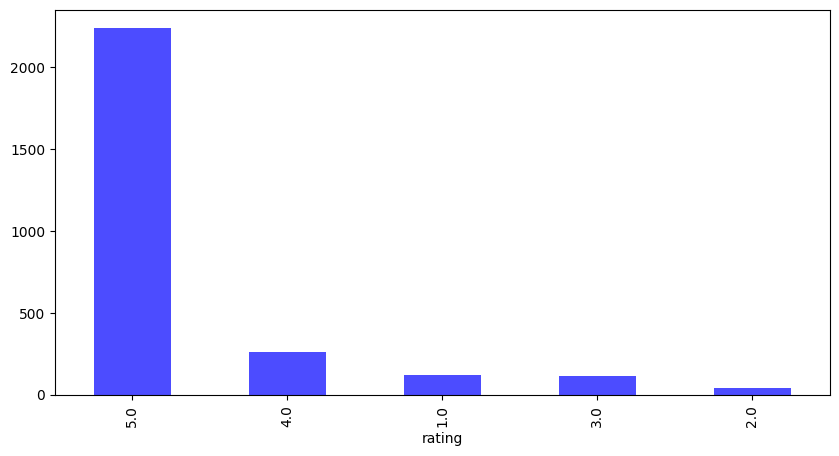

In [68]:
big_df['rating'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

In [67]:
big_df['rating'].isnull().sum()

25761

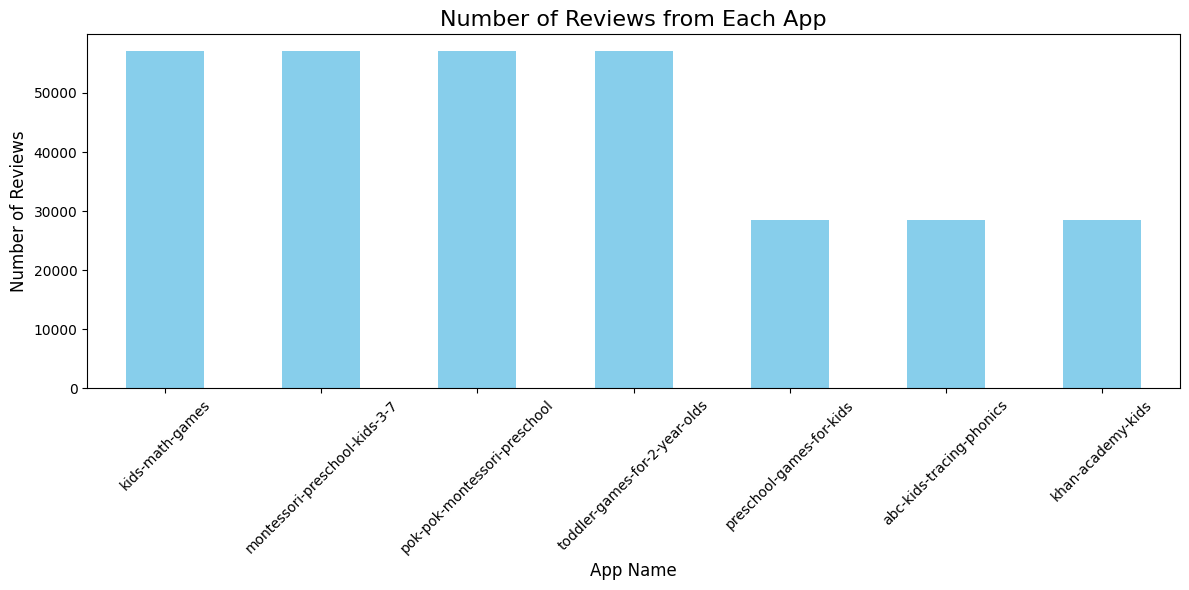

In [64]:
import pandas as pd
import matplotlib.pyplot as plt



# Combine reviews from sheets with the same app name
combined_reviews = pd.DataFrame()
for sheet_name, df in sheets.items():
    # Normalize the sheet name by removing the 'o-' or 'g-' prefix
    app_name = sheet_name.split('-', 1)[-1]
    big_df['Name'] = app_name  # Add a column for the normalized app name
    combined_reviews = pd.concat([combined_reviews, big_df], ignore_index=True)

# Count the number of reviews for each app
review_counts = combined_reviews['Name'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
review_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews from Each App', fontsize=16)
plt.xlabel('App Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
df = pd.read_csv('../final/o-kids-math-games.csv')

In [3]:
df = pd.read_excel("../Deductive_Analysis_Mar3.xlsx", sheet_name="o-khan-academy-kids")
df.rename(columns={'Sentence': 'review'}, inplace=True)
df.rename(columns={'Code': 'Name'}, inplace=True)

In [4]:
df['Name'].value_counts()

Name
Goal oriented                        300
Education                            130
Engaging/Fun                         115
Quality Screen Time                   93
Ease of Use                           78
Well Rounded                          54
Personalization/Variety               42
Targeted                              40
Open-Ended/Explore                    23
Independence                          23
Reinforcement                         17
Attention/Focus                       17
Structure                             15
Creative                              15
Boring                                15
Self Mastery/Growth                   14
Cost                                  13
Auditory Stimuli                      12
Travel                                12
Adult assistance                       7
Calming/Stimulating                    6
Over Stimulated                        6
Fine Motor Skills                      4
Visual Stimuli                         3
Wifi       

In [5]:
from transformers import pipeline
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

emotions dataframe by passing dataframe into roberta model

In [6]:
#create the emotions dataframe needed for spider graphs
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    
    return emotions_df

create 1 spider

In [7]:
#create 1 spider
def create_emotion_spider(emotions_df, title_suffix, color, figsize):
    # Create buffer to store image
    from io import BytesIO
    import base64
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Calculate means and get top 6
    emotion_means = emotions_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:6])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    values = list(top_emotions.values())
    
    # Setup angles
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values += values[:1]
    
    # Plot data
    ax.plot(angles, values, 'o-', linewidth=2, color=color, label='Top 6 Emotions')
    ax.fill(angles, values, alpha=0.25, color=color)
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    # Clear the current figure
    plt.close()
    
    # Encode
    
    
    return graph

combining multiple spiders

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

def create_combined_emotion_spider(df1, df2, df3, title_suffix, colors, figsize=(10, 10)):
    # Combine the dataframes
    combined_df = pd.concat([df1, df2, df3])
    labels = []
    labels.append(df1['Name'].iloc[0])
    labels.append(df2['Name'].iloc[0])
    labels.append(df3['Name'].iloc[0])
    
    # Calculate means and get top 6 emotions
    emotion_means = combined_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:6])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
    
    # Plot each dataframe
    for i, df in enumerate([df1, df2, df3]):
        emotion_means = df.drop(['review', 'Name'], axis=1).mean()
        values = [emotion_means.get(emotion.lower(), 0) for emotion in emotions]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=labels[i - 1])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    plt.close()
    
    return graph

In [9]:
df['Name'].value_counts()

Name
Goal oriented                        300
Education                            130
Engaging/Fun                         115
Quality Screen Time                   93
Ease of Use                           78
Well Rounded                          54
Personalization/Variety               42
Targeted                              40
Open-Ended/Explore                    23
Independence                          23
Reinforcement                         17
Attention/Focus                       17
Structure                             15
Creative                              15
Boring                                15
Self Mastery/Growth                   14
Cost                                  13
Auditory Stimuli                      12
Travel                                12
Adult assistance                       7
Calming/Stimulating                    6
Over Stimulated                        6
Fine Motor Skills                      4
Visual Stimuli                         3
Wifi       

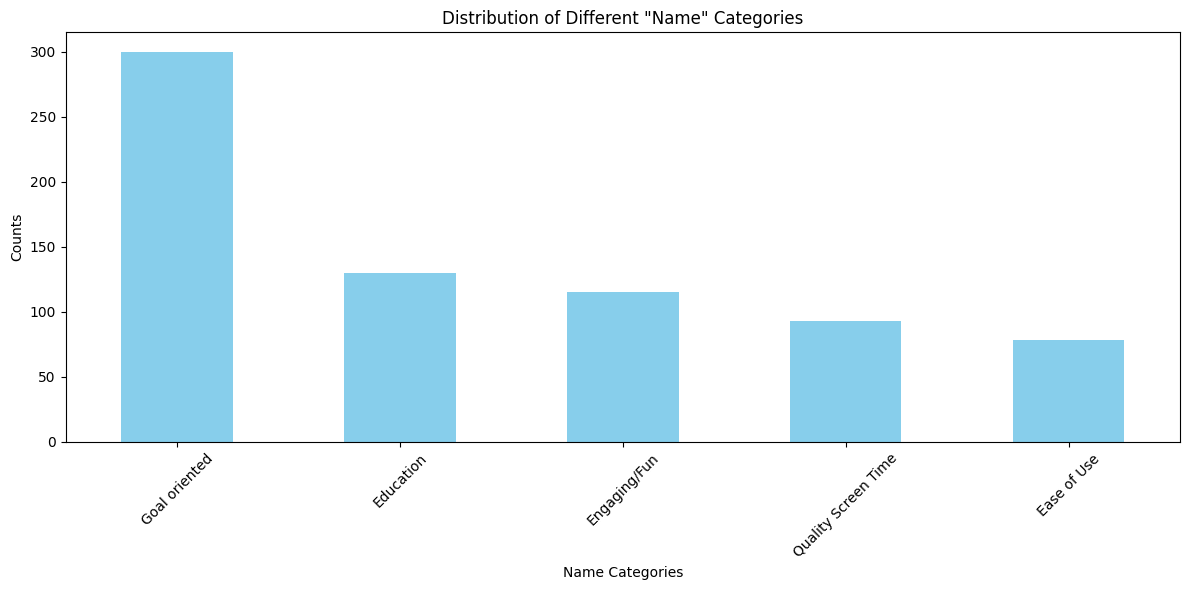

In [10]:
# Calculate the value counts for the 'Name' column
name_counts = df['Name'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
name_counts[:5].plot(kind='bar', color='skyblue')
plt.title('Distribution of Different "Name" Categories')
plt.xlabel('Name Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('name_distribution.png')

# Show the plot
plt.show()

In [11]:
# Get the top 3 most common "Name" values
top_6_codes = name_counts.head(6).index.tolist()

# Print the top 3 names
print(top_6_codes)

['Goal oriented', 'Education', 'Engaging/Fun', 'Quality Screen Time', 'Ease of Use', 'Well Rounded']


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from io import BytesIO
import base64

# Initialize the classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Function to analyze emotions in reviews
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Ensure the review is a string
            review = str(review)
            
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    
    return emotions_df

# Function to create combined emotion spider graph
def create_combined_emotion_spider(dfs, labels, title_suffix, colors, figsize=(10, 10)):
    # Combine the dataframes
    combined_df = pd.concat(dfs)
    
    # Calculate means and get top 6 emotions
    emotion_means = combined_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:6])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
    
    # Plot each dataframe
    for i, df in enumerate(dfs):
        emotion_means = df.drop(['review', 'Name'], axis=1).mean()
        values = [emotion_means.get(emotion.lower(), 0) for emotion in emotions]
        values += values[:1]
        
        ax.plot(angles, values, '-o', linewidth=2, color=colors[i], label=labels[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    plt.close()
    
    return graph

# Example usage
labels = [
    "toddler-games-for-2-year-olds",
    "khan-academy-kids",
    "kids-math-games",
    "montessori-preschool-kids-3-7",
    "pok-pok-montessori-preschool",
    "toddler-games-for-2-year-olds"
]

# Load dataframes and analyze emotions
dfs = []
for label in labels:
    df = pd.read_excel("../Deductive_Analysis_Mar3.xlsx", sheet_name=f"o-{label}")
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    

# Load the Excel file
file_path = '../Deductive_Analysis_Mar3.xlsx'
sheets = pd.read_excel(file_path, sheet_name=None)  # Load all sheets into a dictionary

# Combine reviews from sheets with the same app name
combined_reviews = pd.DataFrame()
for sheet_name, df in sheets.items():
    # Normalize the sheet name by removing the 'o-' or 'g-' prefix
    app_name = sheet_name.split('-', 1)[-1]
    df['App Name'] = app_name  # Add a column for the normalized app name
    combined_reviews = pd.concat([combined_reviews, df], ignore_index=True)



In [13]:
labels = combined_reviews['App Name'].unique()

In [14]:
labels

array(['kids-math-games', 'montessori-preschool-kids-3-7',
       'pok-pok-montessori-preschool', 'preschool-games-for-kids',
       'toddler-games-for-2-year-olds', 'abc-kids-tracing-phonics',
       'khan-academy-kids'], dtype=object)

In [15]:
combined_reviews[combined_reviews['App Name'] == labels[0]]

Sentence  \
0     toddler loooves often comes back love activiti...   
1     absolutely fantastic daughter always phone ann...   
2     absolutely fantastic daughter always phone ann...   
3     idea app great theres one big issue hints enou...   
4     great find grand daughter 6 loves app puzzles ...   
...                                                 ...   
5121  selected thats hints shown app still showing a...   
5122                                          love much   
5123                                           game fun   
5124  ethan gay roger 13550 ethan 4 years old mommy ...   
5125                                     gncjgivnggryvb   

                         Code  Probability  \
0            Auditory Stimuli          0.8   
1          Open-Ended/Explore          0.8   
2                    Annoying          0.7   
3                      Boring          0.8   
4               Goal oriented          0.8   
...                       ...          ...   
5121                   Boring          0.8   
5122  Personalization/Variety          1.0   
5123             Engaging/Fun          1.0   
5124                      Age          1.0   
5125                    Other          1.0   

                                          Justification  \
0     The sentence mentions "congratulatory sound" a...   
1     The sentence mentions "daughter always phone a...   
2     The sentence includes the word "annoying," ind...   
3     The sentence indicates that the user finds the...   
4     The sentence mentions activities like puzzles,...   
...                                                 ...   
5121  The sentence indicates that the user finds the...   
5122  The sentence "love much" implies a positive se...   
5123  The sentence "game fun" clearly indicates that...   
5124  The sentence mentions the ages of multiple ind...   
5125  The given sentence does not seem to relate to ...   

                Source File         App Name  
0     g-kids-math-games.csv  kids-math-games  
1     g-kids-math-games.csv  kids-math-games  
2     g-kids-math-games.csv  kids-math-games  
3     g-kids-math-games.csv  kids-math-games  
4     g-kids-math-games.csv  kids-math-games  
...                     ...              ...  
5121  o-kids-math-games.csv  kids-math-games  
5122  o-kids-math-games.csv  kids-math-games  
5123  o-kids-math-games.csv  kids-math-games  
5124  o-kids-math-games.csv  kids-math-games  
5125  o-kids-math-games.csv  kids-math-games  

[426 rows x 6 columns]

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\1121355069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\1121355069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\1121355069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

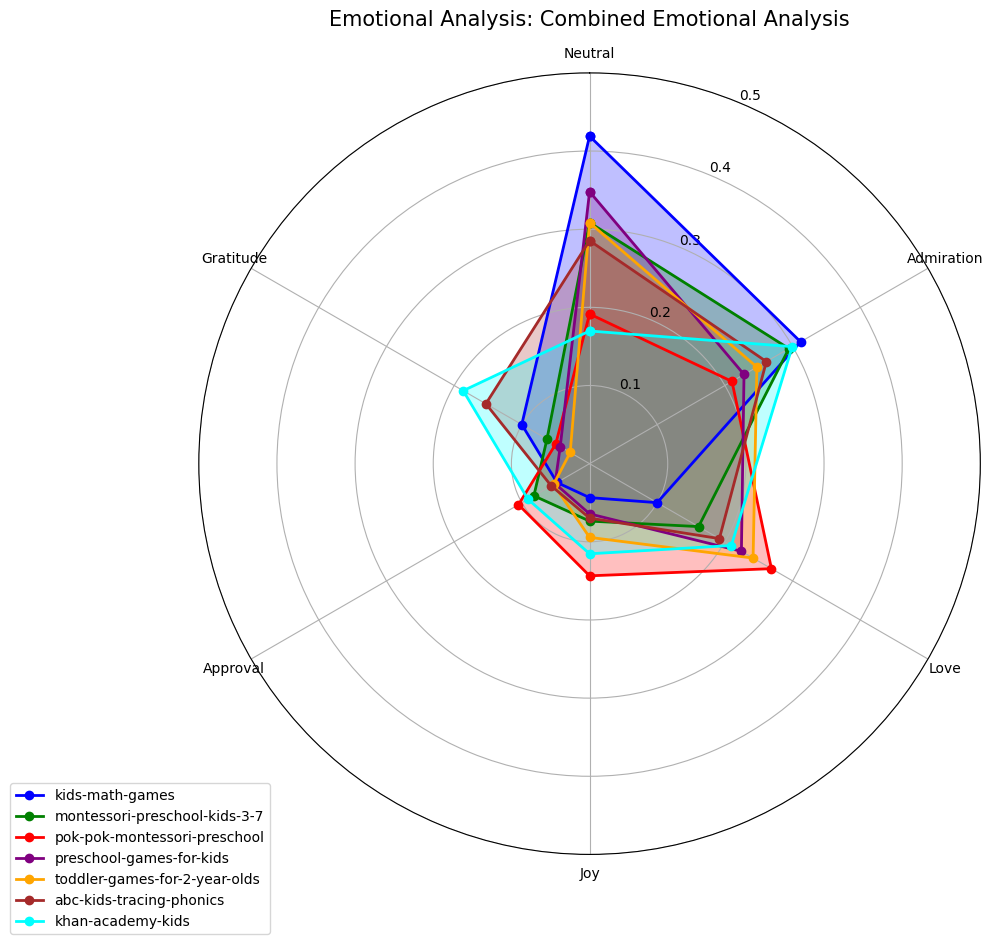

In [16]:
dfs = []
for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df['review'], label)
    dfs.append(emotion_df)
    

img = create_combined_emotion_spider(dfs, labels, 'Combined Emotional Analysis', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

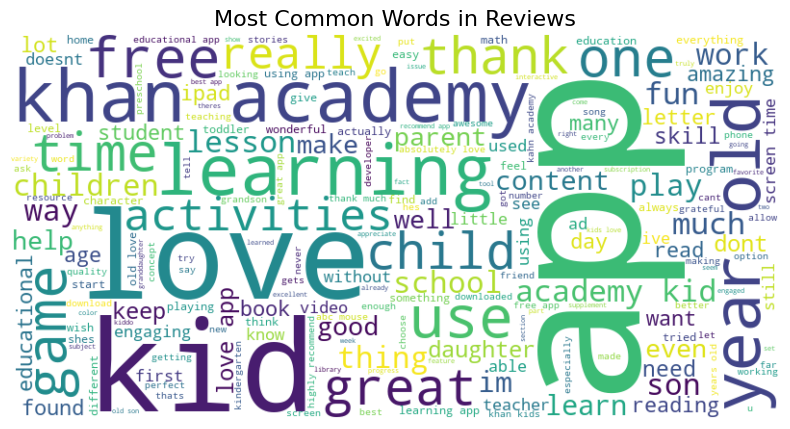

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = " ".join(review for review in dfs[6]['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

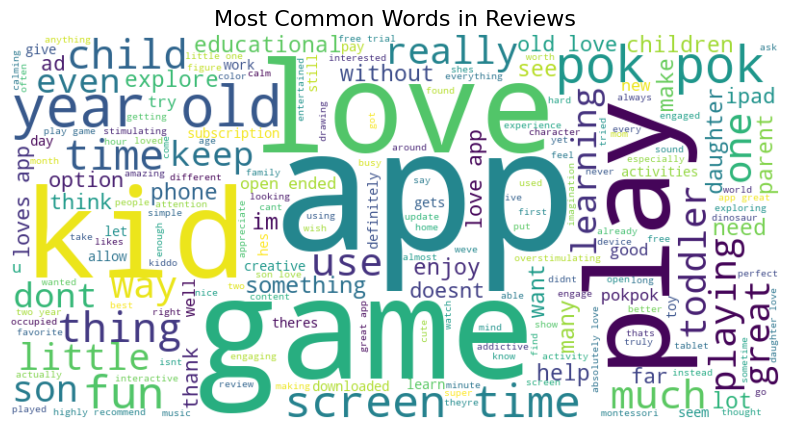

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = " ".join(review for review in dfs[2]['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

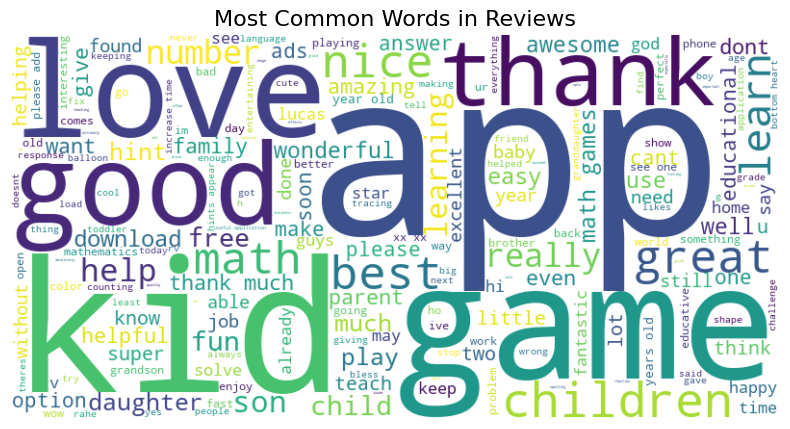

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = " ".join(review for review in dfs[0]['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

In [20]:
labels

array(['kids-math-games', 'montessori-preschool-kids-3-7',
       'pok-pok-montessori-preschool', 'preschool-games-for-kids',
       'toddler-games-for-2-year-olds', 'abc-kids-tracing-phonics',
       'khan-academy-kids'], dtype=object)

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\2692190574.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\2692190574.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\2692190574.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

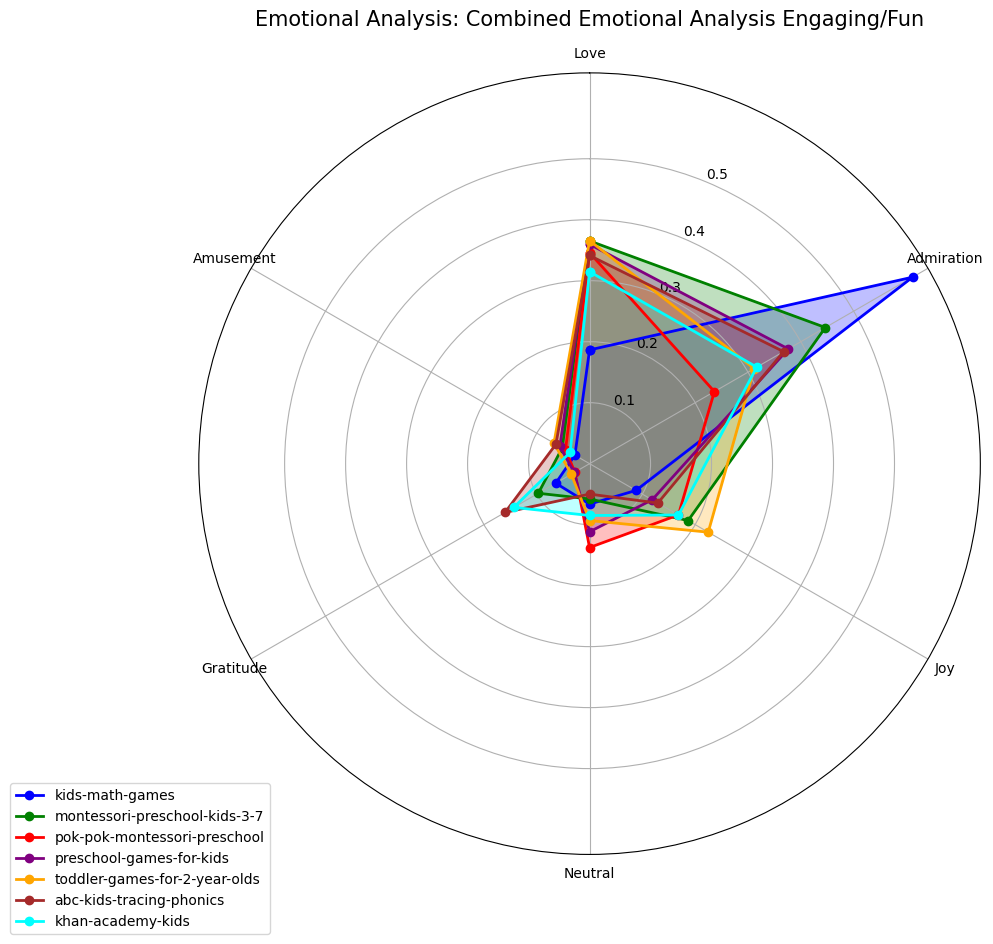

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from io import BytesIO
import base64

# Initialize the classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Function to analyze emotions in reviews
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Ensure the review is a string
            review = str(review)
            
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    
    return emotions_df

# Function to create combined emotion spider graph
def create_combined_emotion_spider(dfs, labels, title_suffix, colors, figsize=(10, 10)):
    # Combine the dataframes
    combined_df = pd.concat(dfs)
    
    # Calculate means and get top 6 emotions
    emotion_means = combined_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:6])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
    
    # Plot each dataframe
    for i, df in enumerate(dfs):
        emotion_means = df.drop(['review', 'Name'], axis=1).mean()
        values = [emotion_means.get(emotion.lower(), 0) for emotion in emotions]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=labels[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    plt.close()
    
    return graph

    
dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[0]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[0]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\4172028642.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\4172028642.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\4172028642.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

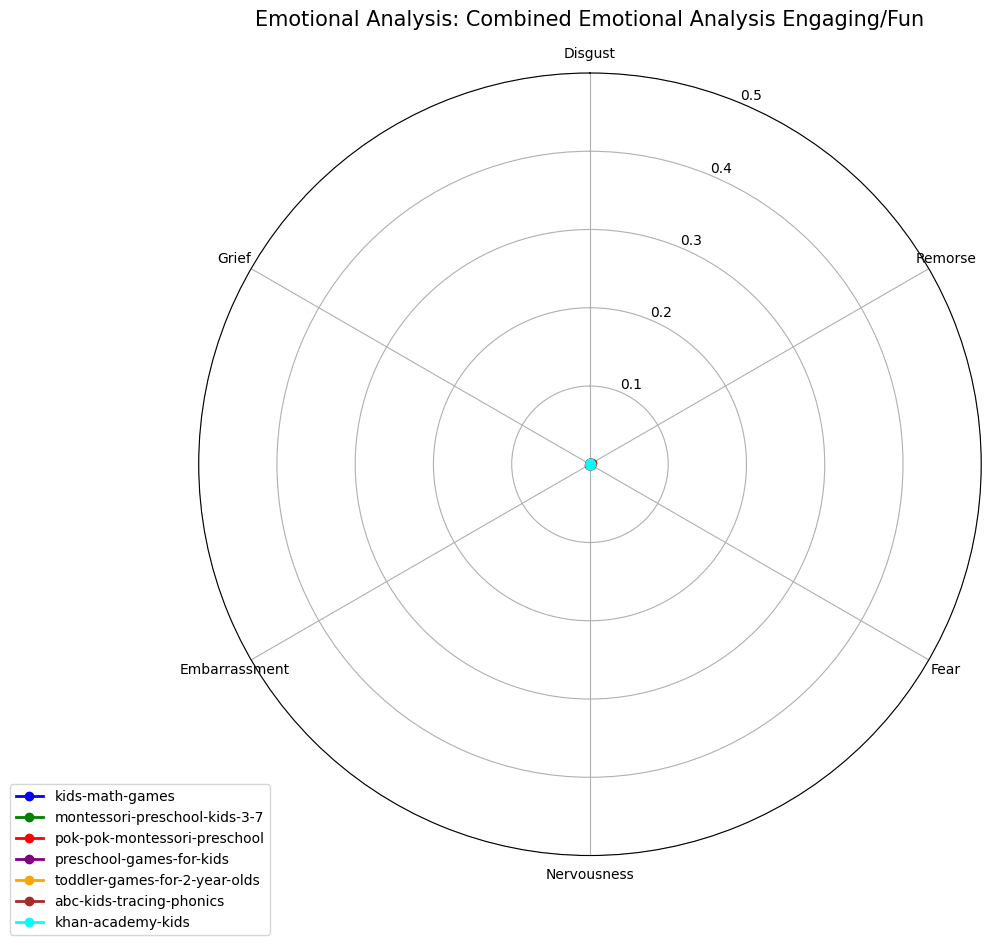

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from io import BytesIO
import base64

# Initialize the classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Function to analyze emotions in reviews
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Ensure the review is a string
            review = str(review)
            
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    
    return emotions_df

# Function to create combined emotion spider graph
def create_combined_emotion_spider(dfs, labels, title_suffix, colors, figsize=(10, 10)):
    # Combine the dataframes
    combined_df = pd.concat(dfs)
    
    # Calculate means and get top 6 emotions
    emotion_means = combined_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[-6:])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
    
    # Plot each dataframe
    for i, df in enumerate(dfs):
        emotion_means = df.drop(['review', 'Name'], axis=1).mean()
        values = [emotion_means.get(emotion.lower(), 0) for emotion in emotions]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=labels[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    plt.close()
    
    return graph

    
dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[0]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[0]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\414207133.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\414207133.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\414207133.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

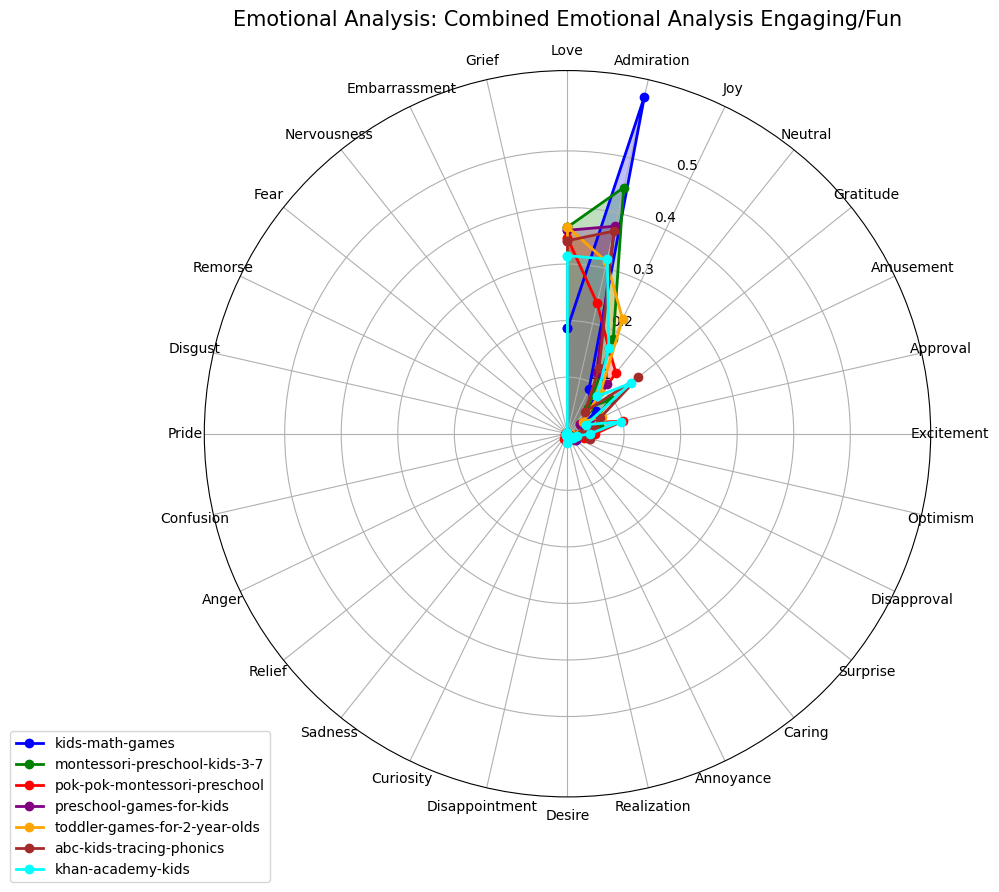

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from io import BytesIO
import base64

# Initialize the classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Function to analyze emotions in reviews
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Ensure the review is a string
            review = str(review)
            
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    
    return emotions_df

# Function to create combined emotion spider graph
def create_combined_emotion_spider(dfs, labels, title_suffix, colors, figsize=(10, 10)):
    # Combine the dataframes
    combined_df = pd.concat(dfs)
    
    # Calculate means and get top 6 emotions
    emotion_means = combined_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True))
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
    
    # Plot each dataframe
    for i, df in enumerate(dfs):
        emotion_means = df.drop(['review', 'Name'], axis=1).mean()
        values = [emotion_means.get(emotion.lower(), 0) for emotion in emotions]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=labels[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    plt.close()
    
    return graph

    
dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[0]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[0]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\4186627665.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\4186627665.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\4186627665.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

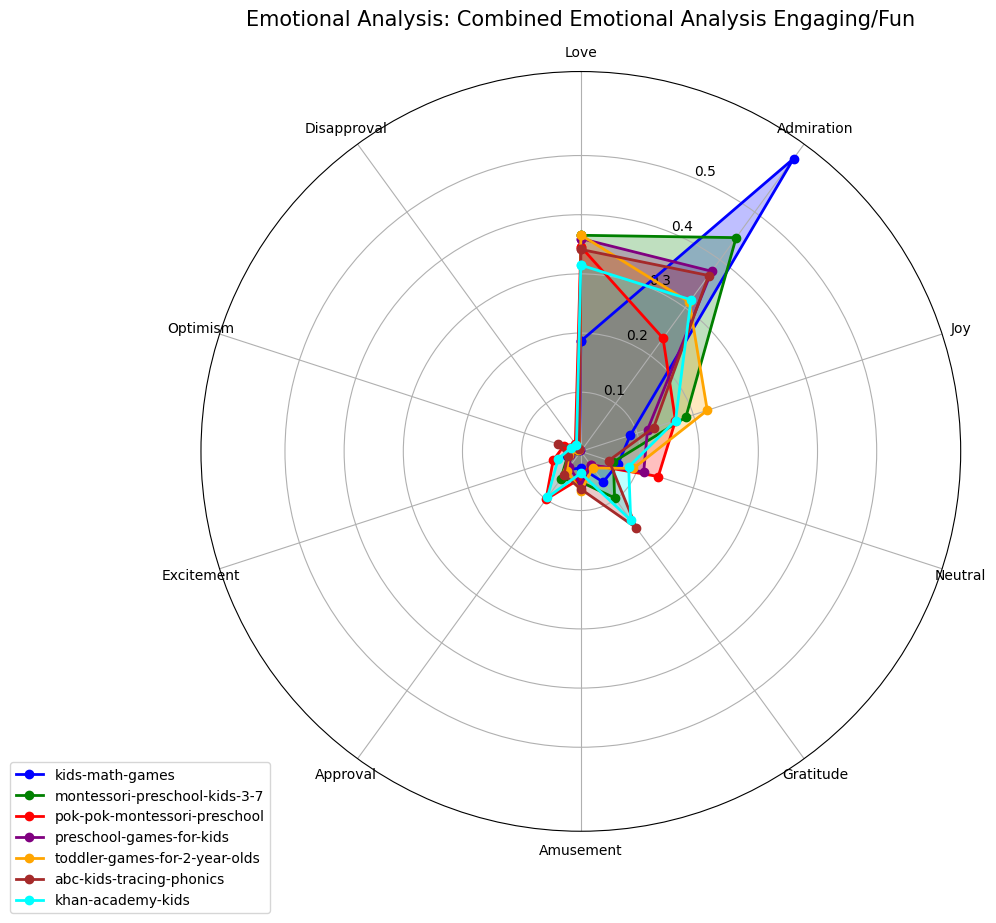

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from io import BytesIO
import base64

# Initialize the classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Function to analyze emotions in reviews
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Ensure the review is a string
            review = str(review)
            
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    
    return emotions_df

# Function to create combined emotion spider graph
def create_combined_emotion_spider(dfs, labels, title_suffix, colors, figsize=(10, 10)):
    # Combine the dataframes
    combined_df = pd.concat(dfs)
    
    # Calculate means and get top 6 emotions
    emotion_means = combined_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:10])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
    
    # Plot each dataframe
    for i, df in enumerate(dfs):
        emotion_means = df.drop(['review', 'Name'], axis=1).mean()
        values = [emotion_means.get(emotion.lower(), 0) for emotion in emotions]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=labels[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    plt.close()
    
    return graph

    
dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[0]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[0]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\1303258898.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\1303258898.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_3004\1303258898.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

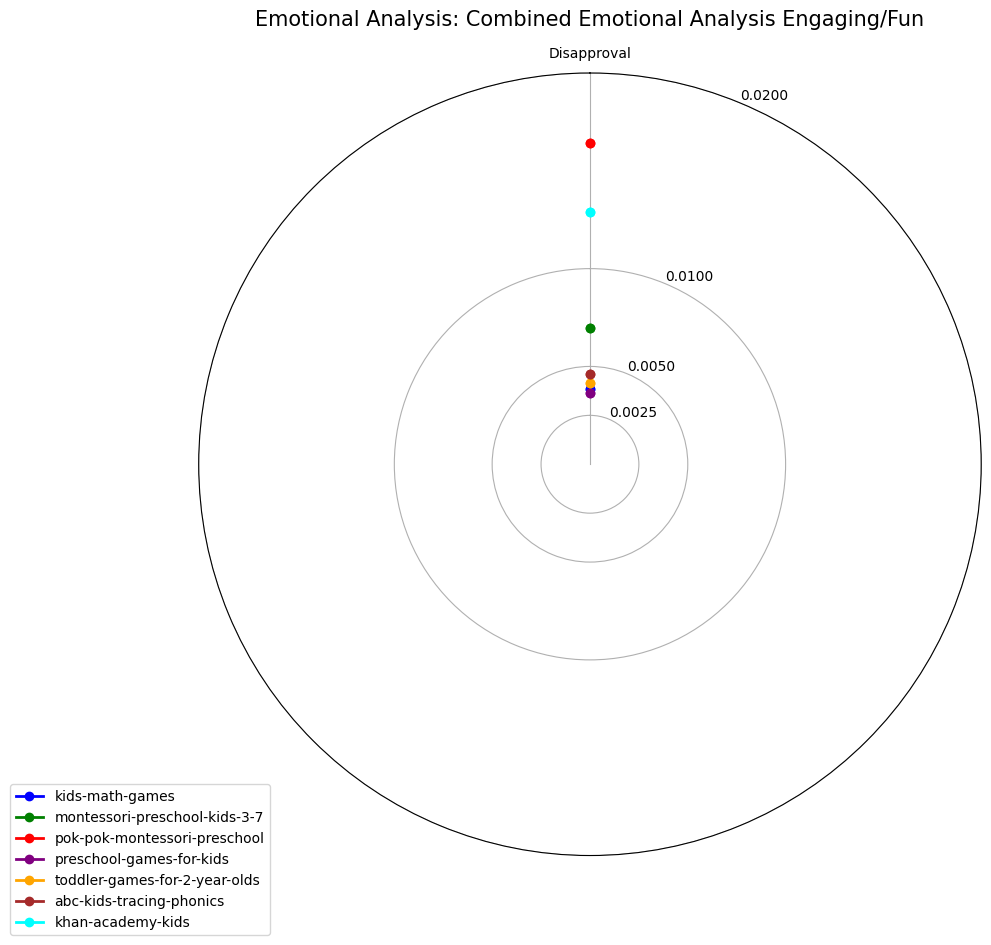

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from io import BytesIO
import base64

# Initialize the classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Function to analyze emotions in reviews
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Ensure the review is a string
            review = str(review)
            
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    emotions_df = emotions_df[emotions_df['disapproval'] > 0.002]
    
    return emotions_df

# Function to create combined emotion spider graph
def create_combined_emotion_spider(dfs, labels, title_suffix, colors, figsize=(10, 10)):
    # Combine the dataframes
    combined_df = pd.concat(dfs)
    
    # Calculate means and get top 6 emotions
    emotion_means = combined_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[9:10])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
    
    # Plot each dataframe
    for i, df in enumerate(dfs):
        emotion_means = df.drop(['review', 'Name'], axis=1).mean()
        values = [emotion_means.get(emotion.lower(), 0) for emotion in emotions]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=labels[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.0025, 0.005, 0.01, 0.02])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    plt.close()
    
    return graph

    
dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[0]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[0]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

In [57]:
emotion_df['review'].iloc[0]

'kahn academy kids best educational kids app found kiddos lessons fun engages kids making exciting learn use app daily supplement learning school 3 6 year old profile things working 6 year old learning read loves reading books app loud 3 year old learning letter sounds app actually pronounces letter sound correctly super impressed havent found common practice education apps even leap frog academy app intuitive use easy kids appreciate leave work independently work alongside whichever choose hard come also love get still get challenged lessons actually grow learn without feeling left discouraged gently nudges get something incorrect math portion wonderful well something exploring app week much use felt compelled leave review already amount already used enjoyed khan academy download without hesitation child wont regret'

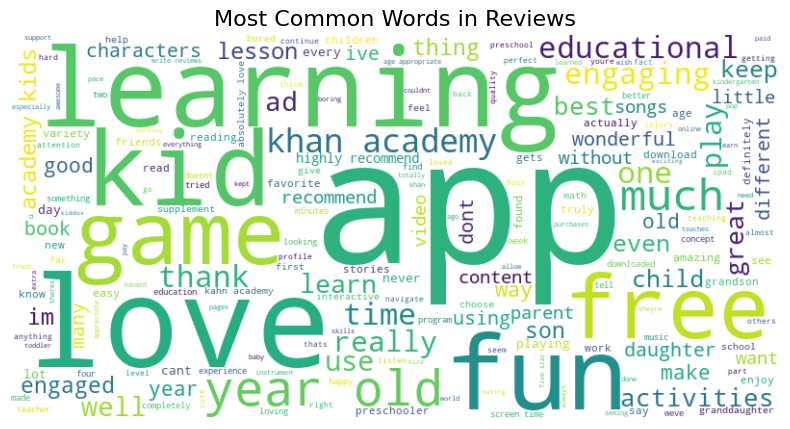

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews from all DataFrames in the list into a single string
text = " ".join(review for review in emotion_df['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

In [60]:
# Get the word counts
word_counts = wordcloud.words_

# Print the word counts
for word, freq in word_counts.items():
    print(f"{word}: {freq}")

app: 1.0
love: 0.4519230769230769
learning: 0.3317307692307692
kid: 0.2932692307692308
fun: 0.28846153846153844
game: 0.21634615384615385
free: 0.20192307692307693
year old: 0.1875
much: 0.14423076923076922
khan academy: 0.13942307692307693
one: 0.125
time: 0.125
educational: 0.11538461538461539
engaging: 0.11538461538461539
thank: 0.11538461538461539
really: 0.11057692307692307
use: 0.10576923076923077
play: 0.10576923076923077
well: 0.10096153846153846
ad: 0.10096153846153846
learn: 0.09615384615384616
great: 0.09615384615384616
best: 0.09134615384615384
activities: 0.09134615384615384
even: 0.08173076923076923
child: 0.08173076923076923
keep: 0.08173076923076923
lesson: 0.07692307692307693
academy kids: 0.07692307692307693
thing: 0.07211538461538461
im: 0.07211538461538461
son: 0.07211538461538461
engaged: 0.07211538461538461
way: 0.0673076923076923
year: 0.0625
old: 0.0625
make: 0.0625
good: 0.0625
wonderful: 0.057692307692307696
book: 0.057692307692307696
different: 0.057692307692

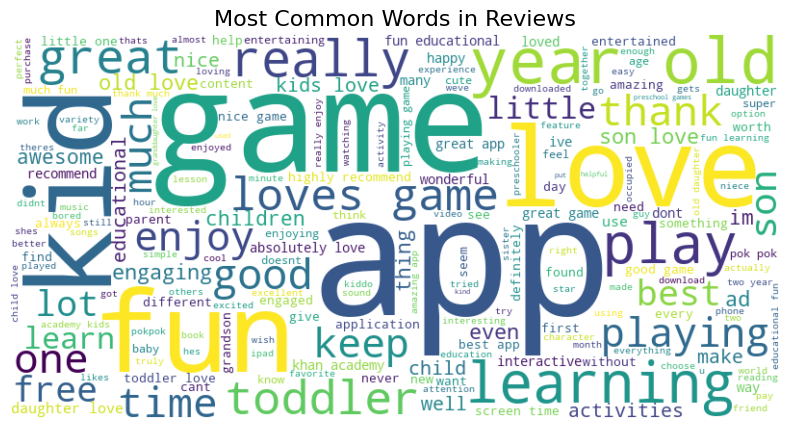

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews from all DataFrames in the list into a single string
text = " ".join(review for df in dfs for review in df['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

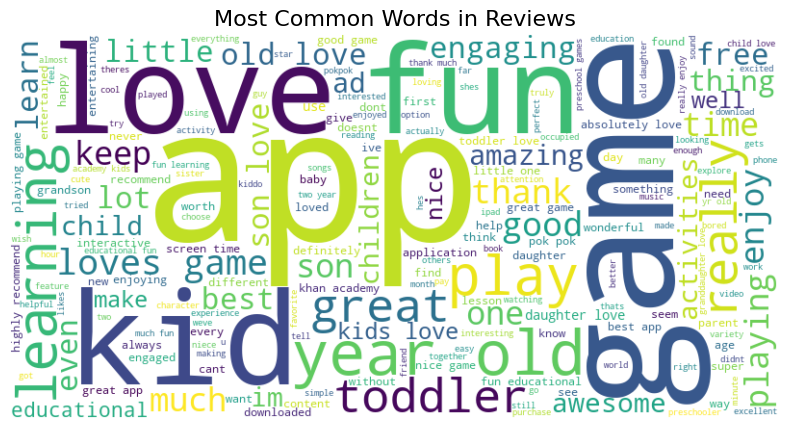

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews from all DataFrames in the list into a single string
text = " ".join(review for df in dfs for review in df['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

In [19]:
code_counts

Code
Engaging/Fun               1110
Goal oriented               878
Education                   612
Ease of Use                 600
Personalization/Variety     407
                           ... 
Controls                      1
Effective                     1
Appreciation                  1
Glitches                      1
Confusing                     1
Name: count, Length: 119, dtype: int64

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\1435163260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\1435163260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\1435163260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

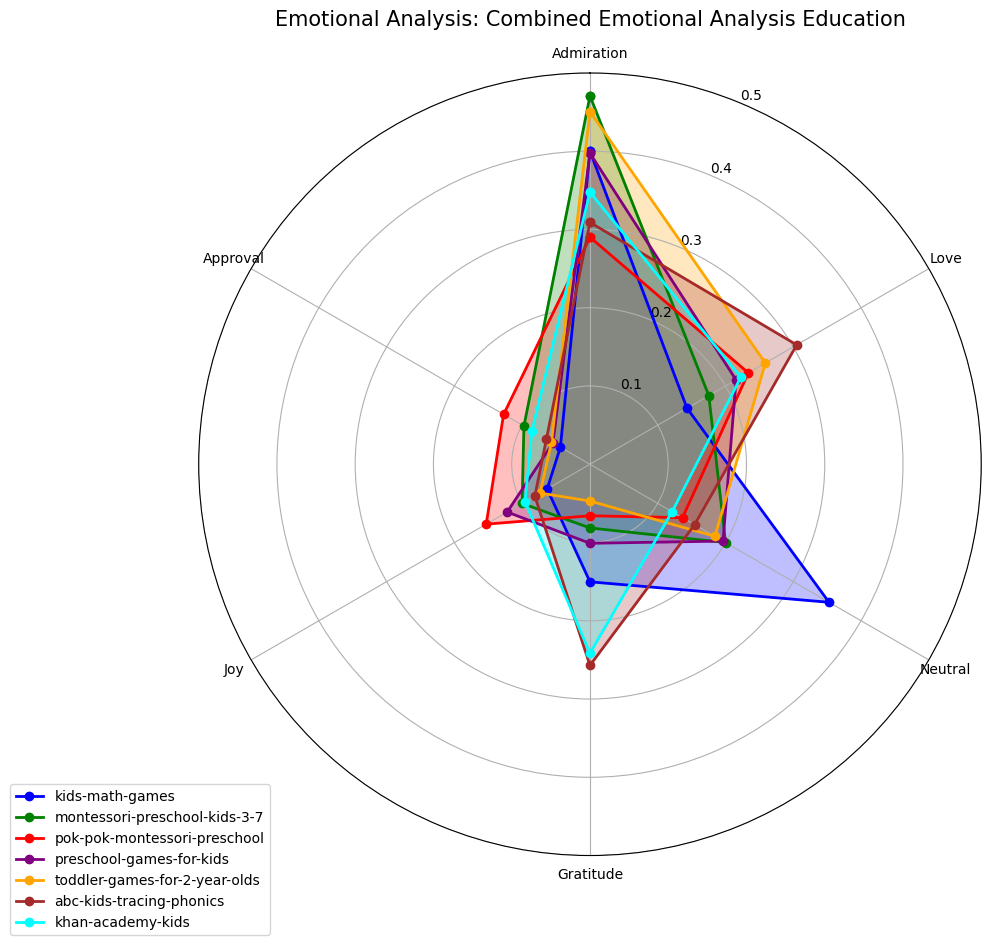

In [20]:

dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[2]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[2]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

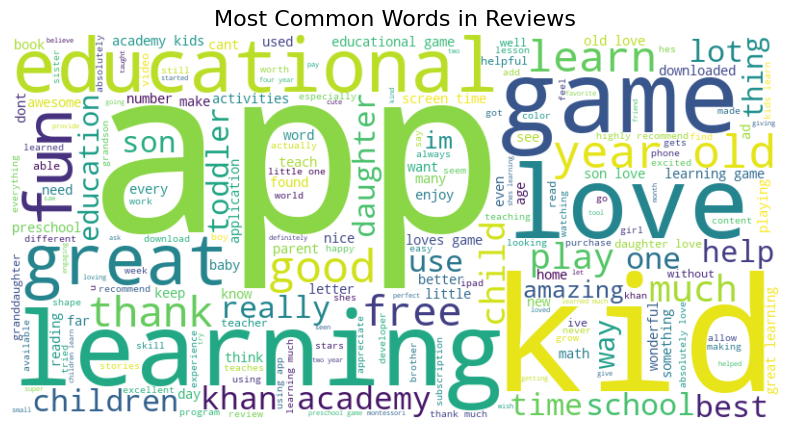

In [ ]:
# Combine all reviews from all DataFrames in the list into a single string
text = " ".join(review for df in dfs for review in df['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\4198353702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\4198353702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\4198353702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

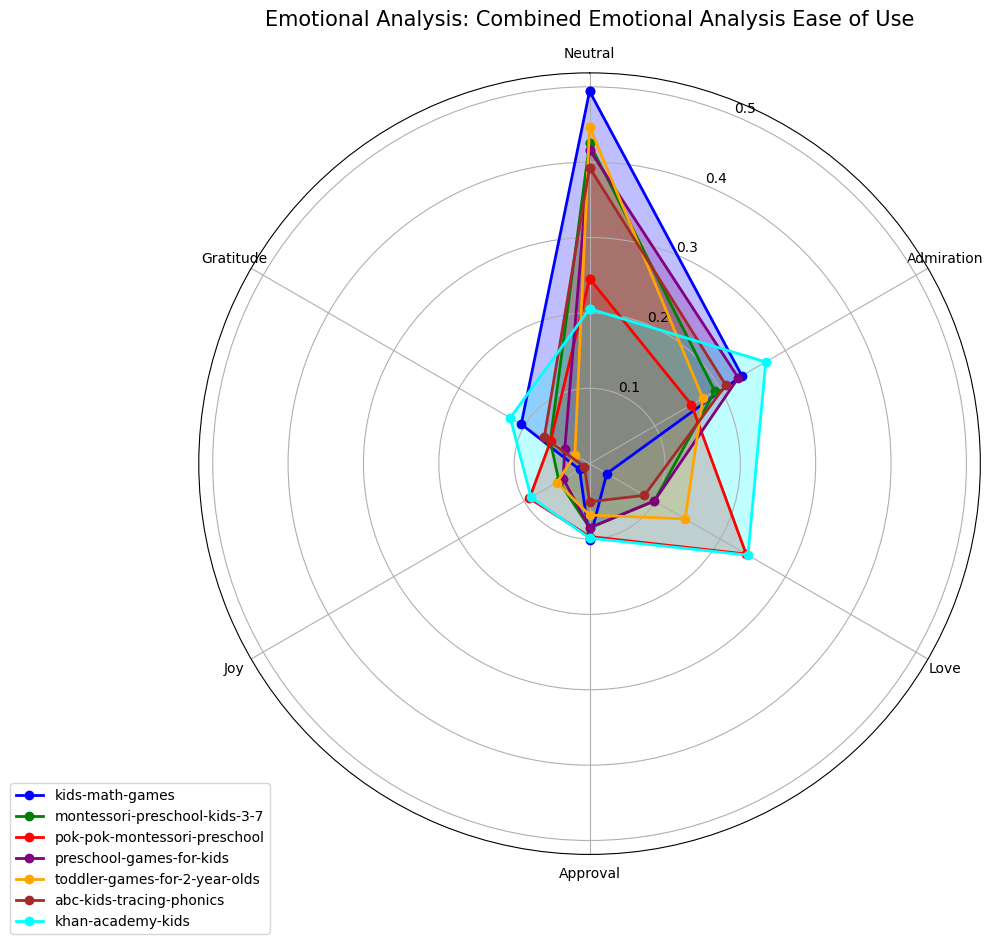

In [34]:

dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[3]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[3]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

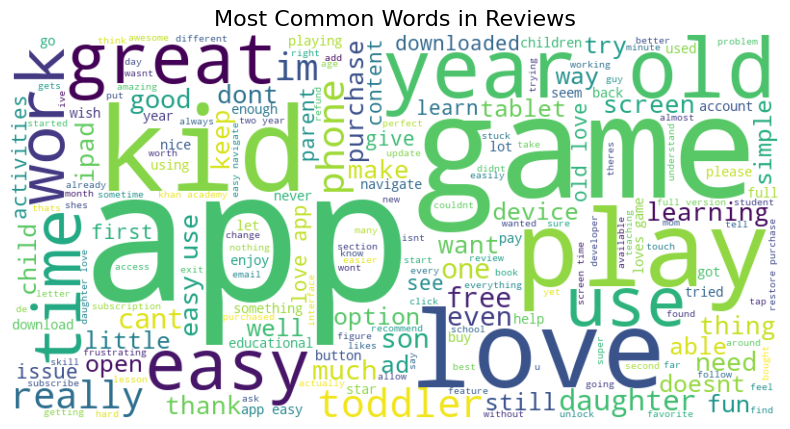

In [35]:
# Combine all reviews from all DataFrames in the list into a single string
text = " ".join(review for df in dfs for review in df['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\663488094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\663488094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
C:\Users\Ryan Jewik\AppData\Local\Temp\ipykernel_16424\663488094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

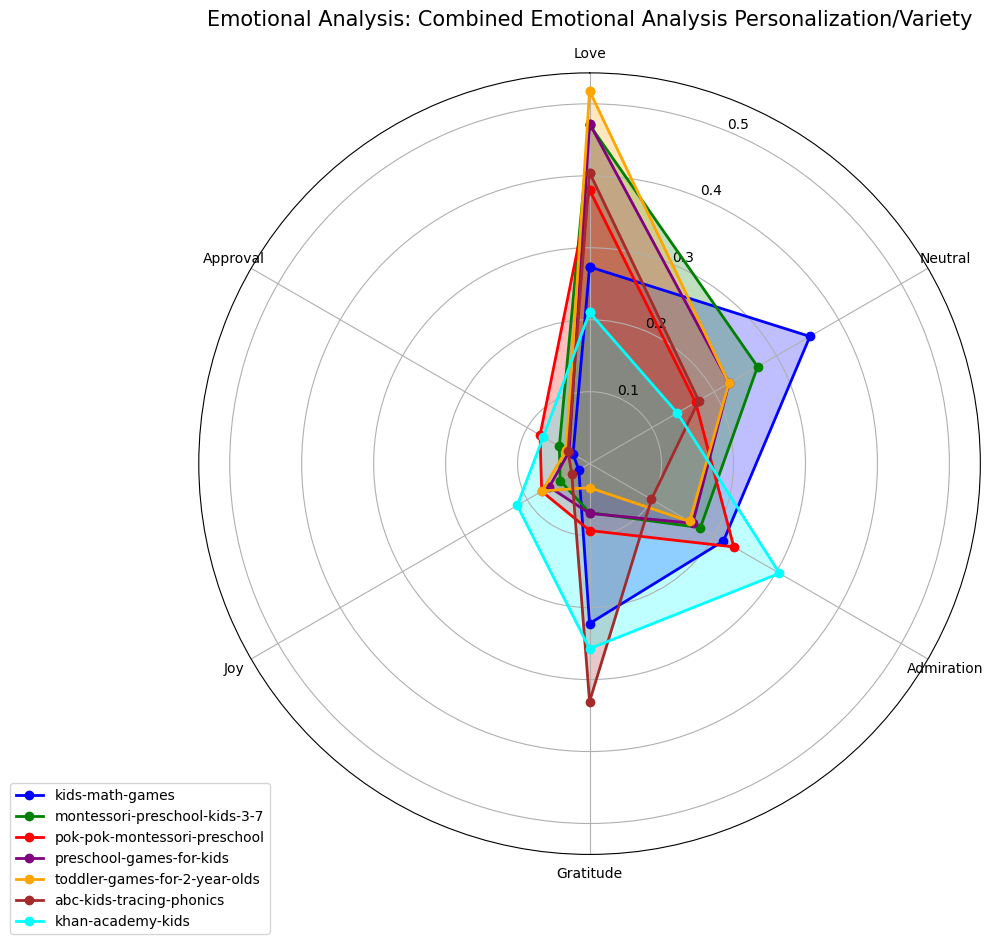

In [32]:

dfs = []
code_counts = combined_reviews['Code'].value_counts()
# Get the top 3 most common "Name" values
top_6_codes = code_counts.head(6).index.tolist()

for label in labels:
    df = combined_reviews[combined_reviews['App Name'] == label]
    df.rename(columns={'Sentence': 'review', 'Code': 'Name'}, inplace=True)
    emotion_df = analyze_app_emotions(df[df['Name'] == top_6_codes[4]]['review'], label)
    dfs.append(emotion_df)




# Create combined spider graph
img = create_combined_emotion_spider(dfs, labels, f'Combined Emotional Analysis {top_6_codes[4]}', ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan'])

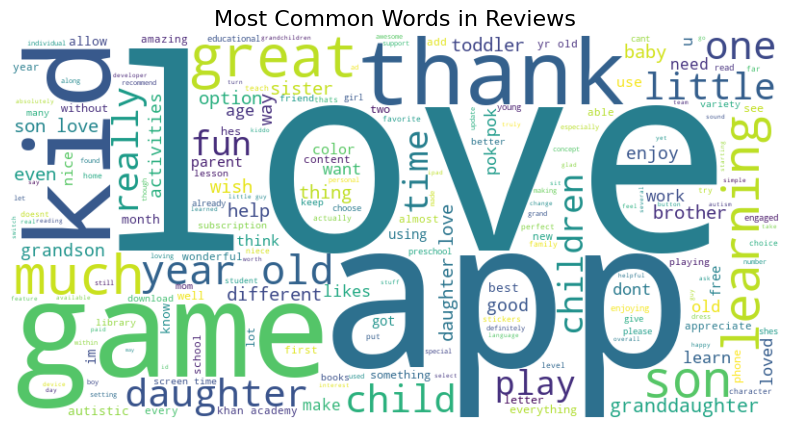

In [33]:
# Combine all reviews from all DataFrames in the list into a single string
text = " ".join(review for df in dfs for review in df['review'].dropna())

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Reviews', fontsize=16)
plt.show()

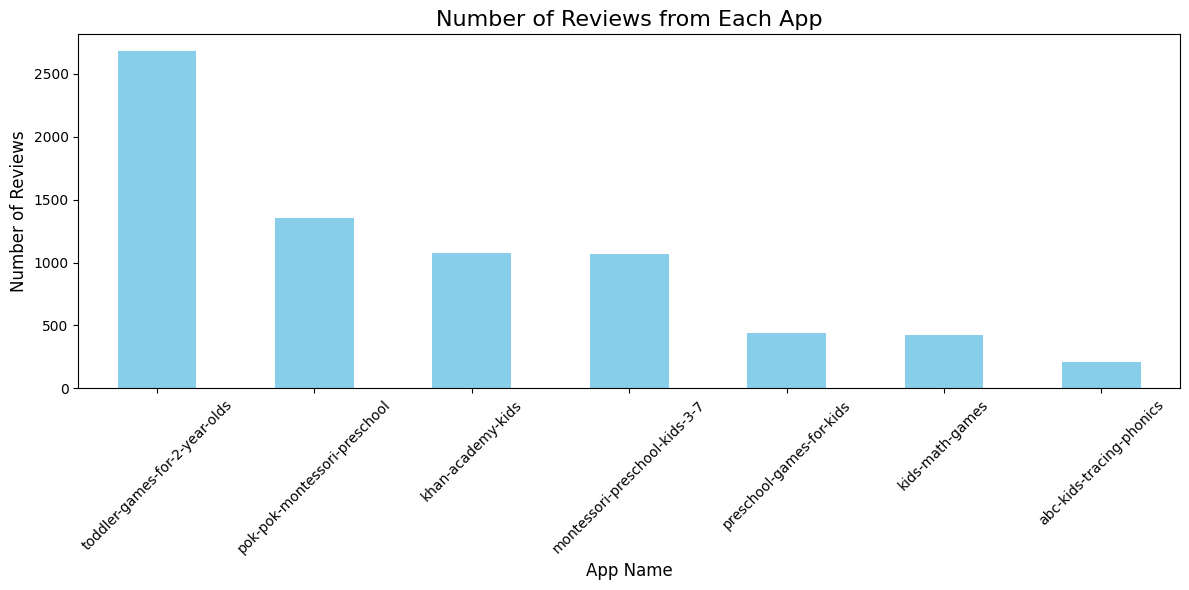

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '../Deductive_Analysis_Mar3.xlsx'
sheets = pd.read_excel(file_path, sheet_name=None)  # Load all sheets into a dictionary

# Combine reviews from sheets with the same app name
combined_reviews = pd.DataFrame()
for sheet_name, df in sheets.items():
    # Normalize the sheet name by removing the 'o-' or 'g-' prefix
    app_name = sheet_name.split('-', 1)[-1]
    df['App Name'] = app_name  # Add a column for the normalized app name
    combined_reviews = pd.concat([combined_reviews, df], ignore_index=True)

# Count the number of reviews for each app
review_counts = combined_reviews['App Name'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
review_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews from Each App', fontsize=16)
plt.xlabel('App Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()